<a href="https://colab.research.google.com/github/Lizochka1511/Valuk/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D0%A0%D0%BE%D0%B1%D0%BE%D1%82%D0%B05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-3716381921.py:24: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_vals, y_plot_f1, label='$y = \sin(x+1) - 1.2$', color='blue')
/tmp/ipython-input-3716381921.py:26: SyntaxWarning: invalid escape sequence '\c'
  plt.contour(X, Y, F2, levels=[0], colors='red', label='$2x + \cos(y) = 2$')
/tmp/ipython-input-3716381921.py:26: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, F2, levels=[0], colors='red', label='$2x + \cos(y) = 2$')


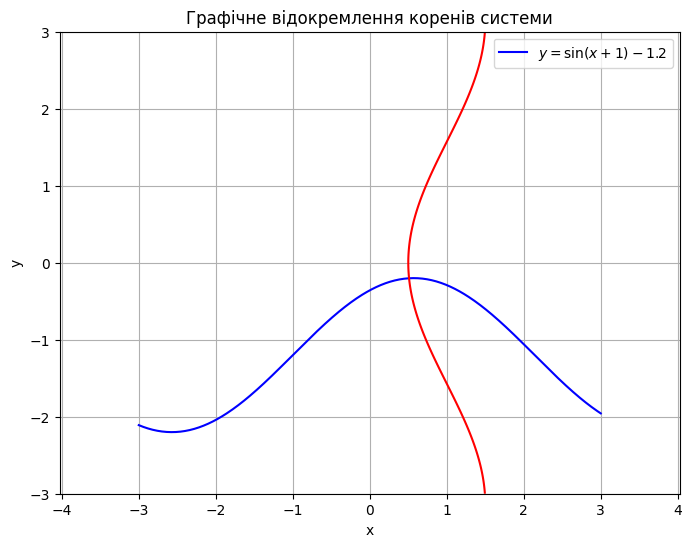

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Визначення функцій для графіків
def f1(x):
    return np.sin(x + 1) - 1.2

def f2_inv(y):
    # x = 1 - cos(y)/2
    return 1 - np.cos(y) / 2

# Створення діапазону значень x та y
x_vals = np.linspace(-3, 3, 400)
y_vals = np.linspace(-3, 3, 400)

# Побудова першої функції (y як функція від x)
y_plot_f1 = f1(x_vals)

# Побудова другої функції (контурний графік неявної функції 2x + cos(y) - 2 = 0)
X, Y = np.meshgrid(x_vals, y_vals)
F2 = 2*X + np.cos(Y) - 2

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_plot_f1, label='$y = \sin(x+1) - 1.2$', color='blue')
# Використання contour для візуалізації другої функції
plt.contour(X, Y, F2, levels=[0], colors='red', label='$2x + \cos(y) = 2$')

plt.title('Графічне відокремлення коренів системи')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()


In [15]:
import numpy as np

# Перетворені функції для ітерацій: X_k+1 = Phi(X_k), Y_k+1 = Psi(Y_k)
def phi(y):
    # x = 1 - cos(y)/2
    return 1 - np.cos(y) / 2

def psi(x):
    # y = sin(x+1) - 1.2
    return np.sin(x + 1) - 1.2

# --- Метод простої ітерації ---
def simple_iteration_system(x0, y0, eps):
    x_prev, y_prev = x0, y0
    iterations = 0
    print(f"{'Ітер.':<5} | {'x_k':<10} | {'y_k':<10} | {'Похибка':<10}")
    print("-" * 40)

    while True:
        x_curr = phi(y_prev)
        y_curr = psi(x_prev)

        # Оцінка похибки як максимальна зміна |x_k - x_{k-1}| або |y_k - y_{k-1}|
        error = max(abs(x_curr - x_prev), abs(y_curr - y_prev))
        iterations += 1

        print(f"{iterations:<5} | {x_curr:<10.6f} | {y_curr:<10.6f} | {error:<10.6e}")

        if error < eps:
            break

        x_prev, y_prev = x_curr, y_curr

    return x_curr, y_curr, iterations

# --- Виконання завдання ---
x0_approx, y0_approx = 0.4, -0.5 # Початкове наближення з графіка
tolerance = 0.001

print(f"Початкове наближення: x0 = {x0_approx}, y0 = {y0_approx}")
print(f"Бажана точність (eps): {tolerance}\n")

final_x, final_y, total_iterations = simple_iteration_system(x0_approx, y0_approx, tolerance)

print(f"\n--- Результати ---")
print(f"Наближене значення кореня: x ≈ {final_x:.6f}, y ≈ {final_y:.6f}")
print(f"Досягнута точність eps = {tolerance}")
print(f"Кількість ітерацій: {total_iterations}")


Початкове наближення: x0 = 0.4, y0 = -0.5
Бажана точність (eps): 0.001

Ітер. | x_k        | y_k        | Похибка   
----------------------------------------
1     | 0.561209   | -0.214550  | 2.854497e-01
2     | 0.511464   | -0.200046  | 4.974484e-02
3     | 0.509971   | -0.201760  | 1.713693e-03
4     | 0.510142   | -0.201849  | 1.709871e-04

--- Результати ---
Наближене значення кореня: x ≈ 0.510142, y ≈ -0.201849
Досягнута точність eps = 0.001
Кількість ітерацій: 4
